In [3]:
import glob, os
import fnmatch
import sys
import astropy
import json
import parsnip
import pandas as pd
import sncosmo
import iminuit
import csv
import lcdata
from astropy.table import QTable, Table, Column
import numpy as np
from matplotlib import pyplot as plt

In [4]:
dir = '../../../cfs/cdirs/desi/science/td/DECam/imaging/LCData_Legacy/'

In [17]:
#read from .json file
for folder in os.listdir(dir):
    if folder.startswith('T202104061414596p021612'):
        id = folder
        for file in os.listdir(dir+folder+'/'):
            if file.endswith('.json'):
                f = open(dir+folder + '/' + file)
                data = json.load(f)
                id = data['ObjectID']
                ra = data['RA-OBJECT']
                dec = data['DEC-OBJECT']
                type = 'Unknown'

        # read redshift of the host start from DESIRT_hosts_redshufts_fujilupe_Y1
        csv_host_rs = open('DESIRT_hosts_redshifts_fujilupe_Y1.csv')
        reader_host = csv.DictReader(csv_host_rs)
        for row in reader_host:
            if row['# TransientID'] == id:
                rs = row[' REDSHIFT']
                
        #construct a metadata table
        metaTable = Table(names=('object_id', 'ra', 'dec', 'type', 'redshift'), dtype=('S2', 'i', 'i', 'S2', 'f'))
        metaTable.add_row((id, ra, dec, type, rs))
                
        #read from .csv file
        lightcurveTable = Table(names=('time(mjd)', 'flux', 'fluxerr', 'band', 'zp', 'zpsys'), dtype=('f', 'f', 'f', 'S', 'f', 'S'))

        for file in os.listdir(dir+id+"/"):
            if file.endswith(".csv"):
                csvFile = open(dir+id+'/'+file)
                reader = csv.DictReader(csvFile)
                for row in reader:
                    if (float(row['mag']) < float(row['lm5'])) & (float(row['mag']) > 12):
                        time = row['mjd']
                        mag = float(row['mag'])
                        magerr = float(row['magerr'])
                        flux = 10**((-mag)/2.5)
                        fluxerr = fluxerr = flux * np.log(10) / 2.5 * magerr
                        band = 'lsst' + row['filter']
                        zp = 22.5
                        zpsys = 'ab'
                        lightcurveTable.add_row((time, flux, fluxerr, band, zp, zpsys))
                                
        #combine the two tables into lcdata
        light_curve_curr = Table({
                'time': list(lightcurveTable['time(mjd)']),
                'flux': list(lightcurveTable['flux']),
                'fluxerr': list(lightcurveTable['fluxerr']),
                'band': list(lightcurveTable['band']),
                'zp': list(lightcurveTable['zp']),
                'zpsys': list(lightcurveTable['zpsys'])})

        light_curve_curr.meta = {
            'object_id': id,
            'ra': ra,
            'dec': dec,
            'type': type,
            'redshift': rs}
                
        dataset = lcdata.from_light_curves([light_curve_curr])

In [20]:
#read from .json file
for folder in os.listdir(dir):
    if folder.startswith('T2021') & (folder != 'T202104061414596p021612'):
        id = folder
        for file in os.listdir(dir+folder+'/'):
            if file.endswith('.json'):
                f = open(dir+folder + '/' + file)
                data = json.load(f)
                id = data['ObjectID']
                ra = data['RA-OBJECT']
                dec = data['DEC-OBJECT']
                type = 'Unknown'

        # read redshift of the host start from DESIRT_hosts_redshufts_fujilupe_Y1
        csv_host_rs = open('DESIRT_hosts_redshifts_fujilupe_Y1.csv')
        reader_host = csv.DictReader(csv_host_rs)
        for row in reader_host:
            if row['# TransientID'] == id:
                rs = row[' REDSHIFT']
                
        #construct a metadata table
        metaTable = Table(names=('object_id', 'ra', 'dec', 'type', 'redshift'), dtype=('S2', 'i', 'i', 'S2', 'f'))
        metaTable.add_row((id, ra, dec, type, rs))
                
        #read from .csv file
        lightcurveTable = Table(names=('time(mjd)', 'flux', 'fluxerr', 'band', 'zp', 'zpsys'), dtype=('f', 'f', 'f', 'S', 'f', 'S'))

        for file in os.listdir(dir+id+"/"):
            if file.endswith(".csv"):
                csvFile = open(dir+id+'/'+file)
                reader = csv.DictReader(csvFile)
                for row in reader:
                    if (float(row['mag']) < float(row['lm5'])) & (float(row['mag']) > 12):
                        time = row['mjd']
                        mag = float(row['mag'])
                        magerr = float(row['magerr'])
                        flux = 10**((-mag)/2.5)
                        fluxerr = fluxerr = flux * np.log(10) / 2.5 * magerr
                        band = 'lsst' + row['filter']
                        zp = 22.5
                        zpsys = 'ab'
                        lightcurveTable.add_row((time, flux, fluxerr, band, zp, zpsys))
                                
        #combine the two tables into lcdata
        light_curve_curr = Table({
                'time': list(lightcurveTable['time(mjd)']),
                'flux': list(lightcurveTable['flux']),
                'fluxerr': list(lightcurveTable['fluxerr']),
                'band': list(lightcurveTable['band']),
                'zp': list(lightcurveTable['zp']),
                'zpsys': list(lightcurveTable['zpsys'])})

        light_curve_curr.meta = {
            'object_id': id,
            'ra': ra,
            'dec': dec,
            'type': type,
            'redshift': rs}
        
        if not isinstance(id, str):
            print(id)
                
        dataset_curr = lcdata.from_light_curves([light_curve_curr])
        dataset += dataset_curr

In [23]:
j=0
for i in dataset.light_curves:
    print(i.meta)
    j+=1
print(j)

{'object_id': 'T202103221404394p014626', 'ra': 211.16428283, 'dec': 1.77410113, 'type': 'Unknown', 'redshift': 0.21736402425945803}
{'object_id': 'T202103221404436p013845', 'ra': 211.18169987, 'dec': 1.64603151, 'type': 'Unknown', 'redshift': 0.230703324432261}
{'object_id': 'T202103221409554p014131', 'ra': 212.48101268, 'dec': 1.69201116, 'type': 'Unknown', 'redshift': 0.21166672396558492}
{'object_id': 'T202103221410460p010610', 'ra': 212.69173833, 'dec': 1.10293052, 'type': 'Unknown', 'redshift': 1.641260747859841}
{'object_id': 'T202103221411516m011106', 'ra': 212.96521938, 'dec': -1.18516874, 'type': 'Unknown', 'redshift': 0.13819624970004474}
{'object_id': 'T202103221414005m000548', 'ra': 213.50247569, 'dec': -0.09670431, 'type': 'Unknown', 'redshift': 0.12578509812651706}
{'object_id': 'T202103221414411p013138', 'ra': 213.67153047, 'dec': 1.52734761, 'type': 'Unknown', 'redshift': 1.2049583871606975}
{'object_id': 'T202103221418159p005318', 'ra': 214.56653909, 'dec': 0.88842676,

In [24]:
#make prediction with the built-in plasticc model

model = parsnip.load_model('plasticc')
predictions_plasticc = model.predict(dataset.light_curves)

/global/homes/a/alinas/.local/cori/3.9-anaconda-2021.11/lib/python3.9/site-packages/parsnip/parsnip.py:297: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:204.)
  self.band_interpolate_weights = torch.FloatTensor(band_weights).to(self.device)


Preprocessing dataset: 100%|██████████| 256/256 [00:00<00:00, 348.46it/s]


NameError: name 'master' is not defined

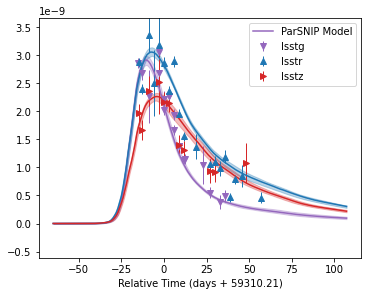

In [43]:
#make plots with the model

for i in range(0,256):
    parsnip.plot_light_curve(dataset.light_curves[i], model)
    plt.savefig('All Light Curve Plots with lsst/lightcurve-'+dataset.light_curves[i].meta['object_id']+'.png',dpi=200)
    parsnip.plot_spectrum(dataset.light_curves[i], time=59341.)
    plt.savefig('All Light Curve Plots with lsst/spectrum-'+dataset.light_curves[i].meta['object_id']+'.png',dpi=200)

In [25]:
classifier_plasticc = parsnip.Classifier.load('./classifier_plasticc')

/global/common/software/nersc/cori-2022q1/sw/python/3.9-anaconda-2021.11/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [26]:
#make classification with the new dataset

classifications_plasticc = classifier_plasticc.classify(predictions_plasticc)

In [27]:
classifications_plasticc

object_id,KN,SLSN-I,SNII,SNIa,SNIa-91bg,SNIax,SNIbc,TDE
str23,float64,float64,float64,float64,float64,float64,float64,float64
T202103221404394p014626,0.10702902831238151,0.005553123798154568,0.05276832465748762,0.12714625097571847,0.012525447701050293,0.3150787937821102,0.07226416668213162,0.30763486409096574
T202103221404436p013845,0.18238905081535725,0.0071813607583727694,0.29095690812075775,0.03487537022187968,0.012738479311239434,0.26294866966414887,0.09316501182294187,0.11574514928530251
T202103221409554p014131,0.03154960942451631,0.003328455871853369,0.31382770999501897,0.010758242291620888,0.11665496715108088,0.3374312512179137,0.16335226116890547,0.023097502879090452
T202103221410460p010610,0.12090839927885502,0.005761447921513176,0.1192865059605934,0.0052747556633653755,0.0028879823172700413,0.0072914130253333796,0.01675639132028891,0.7218331045127807
T202103221411516m011106,0.12360909313329545,0.0006092345964549555,0.031865533906564096,0.0073595563033021045,0.010067196043338621,0.7670261705680776,0.04554097900699068,0.013922236441976307
T202103221414005m000548,0.006854483300618994,0.0009150174753038874,0.012506581766742223,0.0023167627810415626,0.03384478835171228,0.913994305664348,0.028622970964109574,0.0009450896961235389
T202103221414411p013138,0.006732623472277073,0.007132909037517401,0.03028275201055297,0.008280682786921862,0.0016965903695335862,0.002741744109079914,0.0033465845593778935,0.9397861136547391
T202103221418159p005318,0.11608752348559781,0.0005266769458983878,0.023928349773516346,0.008990906847812917,0.009592313276380748,0.7875996898867531,0.03511603828120592,0.018158501502834774
T202103221418312m020724,0.006694607750546514,0.0010077427173087337,0.005147631606942012,0.86464231388115,0.05746150902429057,0.03727131434101609,0.018776524372445428,0.008998356306300661


In [28]:
header = ['object_id', 'KN', 'SLSN-I', 'SNII', 'SNIa', 'SNIa-91bg', 'SNIax', 'SNIbc', 'TDE']

In [39]:
#save into a csv file

with open('Classifications.csv', 'w') as Classification_file:
    writer = csv.writer(Classification_file)
    writer.writerow(header)
    for i in range(0, 256):
        writer.writerow(classifications_plasticc[i])

In [40]:
#read from a csv file

csv_classification = open('Classifications.csv')
reader_host_1 = csv.DictReader(csv_classification)
for row in reader_host_1:
    print (row)

{'object_id': 'T202103221404394p014626', 'KN': '0.10702902831238151', 'SLSN-I': '0.005553123798154568', 'SNII': '0.05276832465748762', 'SNIa': '0.12714625097571847', 'SNIa-91bg': '0.012525447701050293', 'SNIax': '0.3150787937821102', 'SNIbc': '0.07226416668213162', 'TDE': '0.30763486409096574'}
{'object_id': 'T202103221404436p013845', 'KN': '0.18238905081535725', 'SLSN-I': '0.0071813607583727694', 'SNII': '0.29095690812075775', 'SNIa': '0.03487537022187968', 'SNIa-91bg': '0.012738479311239434', 'SNIax': '0.26294866966414887', 'SNIbc': '0.09316501182294187', 'TDE': '0.11574514928530251'}
{'object_id': 'T202103221409554p014131', 'KN': '0.03154960942451631', 'SLSN-I': '0.003328455871853369', 'SNII': '0.31382770999501897', 'SNIa': '0.010758242291620888', 'SNIa-91bg': '0.11665496715108088', 'SNIax': '0.3374312512179137', 'SNIbc': '0.16335226116890547', 'TDE': '0.023097502879090452'}
{'object_id': 'T202103221410460p010610', 'KN': '0.12090839927885502', 'SLSN-I': '0.005761447921513176', 'SNII